# **PREDICTING THE TEN YEAR RISK OF DEVELOPING HEART DISEASE USING MACHINE LEARNING**

# <h1 style='background:#4682B4; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>Heart Disease Prediction</center></h1>

<img src = "https://media2.giphy.com/media/1Bd7DmRvbhV5UPkoDw/200w.gif?cid=6c09b952jvyzls0rug1imymtahrpm3esba3lkwv1mcd412kb&ep=v1_gifs_search&rid=200w.gif&ct=g" width = 900 height = 400/>

Heart disease (heart disease) is a group of diseases related to cardiovascular diseases, manifested by a violation of the normal functioning of the heart. May be caused by damage to the epicardium, pericardium, myocardium, endocardium, valvular apparatus of the heart, heart vessels.

Heart disease can last a long time in a latent form, clinically not manifesting itself. Along with various tumors, these diseases are today the main cause of premature death in developed countries.

The uninterrupted operation of the circulatory system, which consists of the heart as a muscle pump and a network of blood vessels, is a necessary condition for the normal functioning of the body.

According to the National Heart, Lung and Blood Institute in Framingham (USA), the most important factors in the development of cardiovascular disease in humans are obesity, sedentary lifestyle and smoking.



In [1]:
import os
os.listdir()

['.bash_history',
 '.cache',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.matplotlib',
 '.packettracer',
 '.viminfo',
 '.VirtualBox',
 '.vscode',
 '200w.gif',
 '3D Objects',
 'AI LAB preparation-Copy1.ipynb',
 'AI LAB preparation-Copy2.ipynb',
 'Ali.sql',
 'Ali1.sql',
 'Ali2.sql',
 'anaconda3',
 'AppData',
 'Application Data',
 'Cisco Packet Tracer 7.3.0',
 'Client.ipynb',
 'computer programmer codes',
 'Contacts',
 'Cookies',
 'Copy_of_coronary_heart_disease_prediction.ipynb',
 'Desktop',
 'Documents',
 'Downloads',
 'DS Project.ipynb',
 'Favorites',
 'Figure_1.png',
 'framingham.csv',
 'homeuser.sql',
 'HousePredictionProject.ipynb',
 'hr.sql',
 'hr1.sql',
 'IntelGraphicsProfiles',
 'intro-to-git',
 'k21-3390.ipynb',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{c782f077-3bfd-11ee-8d39-887873eb0941}.TM.blf',
 'NTUSER.DAT{c782f077-3bfd-11ee-8d39-887873eb0941}.TM

# INTRODUCTION

Coronary Heart Disease (CHD) remains a critical global health concern, responsible for a substantial portion of cardiovascular-related morbidity and mortality. Identifying individuals at risk of developing CHD is paramount for timely intervention and prevention efforts. This project aims to harness the power of data analysis and predictive modeling to better understand the factors associated with Ten-Year CHD risk and to build a reliable predictive model.

# Background

CHD is a complex, multifactorial condition influenced by a myriad of genetic, lifestyle, and medical factors. Understanding the interplay between these factors can significantly improve our ability to identify individuals at heightened risk. To achieve this, we are utilizing a comprehensive dataset encompassing various demographic, medical, and lifestyle-related variables.

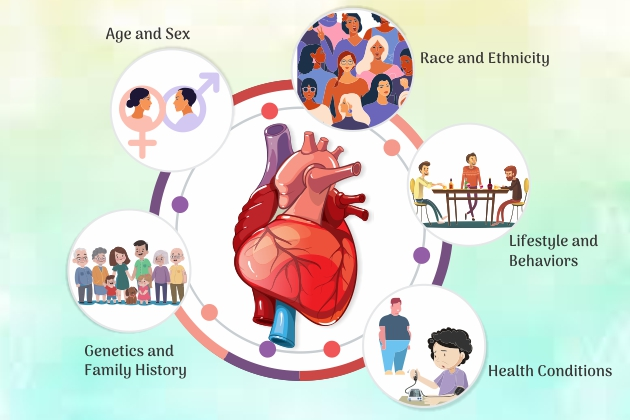

**# importing necessary libraries**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data Analysis
import pandas as pd
import numpy as np


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go


#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
#from xgboost import XGBClassifier

#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3390 records and 16 attributes.

# Variables
Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.

# Data Description
## Demographic:
Sex: male or female("M" or "F")

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Education :1:Higher Secondary,2:Graduation,3:Post Graduation,4:PHD
##Behavioral
Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

## Medical( history)
BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

## Medical(current)

Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

Glucose: glucose level (Continuous)

## Predict variable (desired target)

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) 

**# Loading and Exploring the Dataset**


In [5]:
df=pd.read_csv("framingham.csv")

In [6]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# **Data Preprocessing**

# **A. Data distribution**

To visualize the dataset's distribution, we can create a histogram.

# **A. Checking for Missing Values**

In [8]:
missing_data=df.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
The total percentage of missing data is 15.21%


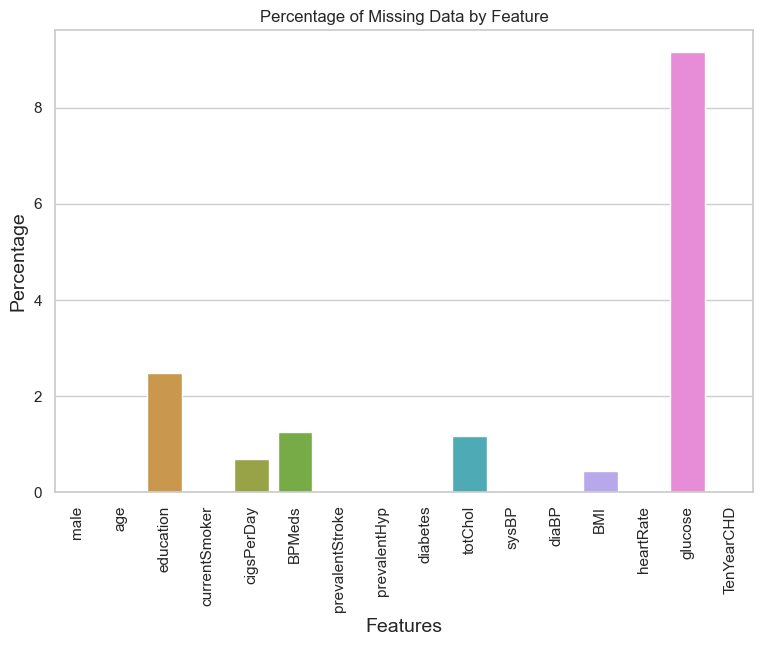

In [9]:
# Calculate the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The feature 'glucose' stands out with the highest missing data percentage, approximately 9%. While some other features have minimal missing data.

Imputing missing values, especially in a healthcare dataset like this, could introduce potential biases. Consulting with domain experts is crucial because healthcare data directly impacts individuals' lives, making it essential to proceed cautiously with any data imputation methods.

In [10]:
# Drop missing values
df.dropna(axis=0,inplace=True)

In [11]:
df.shape

(3658, 16)

## **Case Counts**

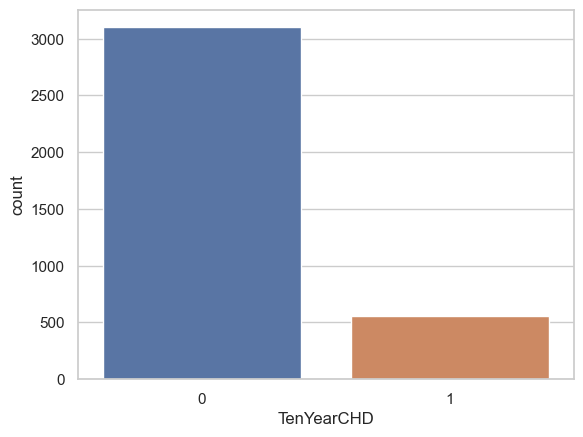

There are 3101 patients without heart disease and 557 patients with heart disease


In [12]:
sns.countplot(x="TenYearCHD",data=df)
plt.show()
cases=df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease")

The ratio of individuals without the disease to those with the disease is approximately 1:5.57, indicating a significant class imbalance. This imbalance should be considered when developing and evaluating predictive models, as it may impact the model's performance and interpretation.


In [13]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
categorical_features=['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [15]:
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

male :
male
0    2035
1    1623
Name: count, dtype: int64
------------------
education :
education
1.0    1526
2.0    1101
3.0     608
4.0     423
Name: count, dtype: int64
------------------
currentSmoker :
currentSmoker
0    1869
1    1789
Name: count, dtype: int64
------------------
BPMeds :
BPMeds
0.0    3547
1.0     111
Name: count, dtype: int64
------------------
prevalentStroke :
prevalentStroke
0    3637
1      21
Name: count, dtype: int64
------------------
prevalentHyp :
prevalentHyp
0    2518
1    1140
Name: count, dtype: int64
------------------
diabetes :
diabetes
0    3559
1      99
Name: count, dtype: int64
------------------


In [16]:
# # changing the data dtype of all contineous variable into int

numeric_features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]


# **Exploratory Data** **Analysis**

## **Univariant** **Analysis**

Refrence to learn displot: https://youtu.be/99gCewBIbDc?si=4l6TE3o6ftDTVPyZ

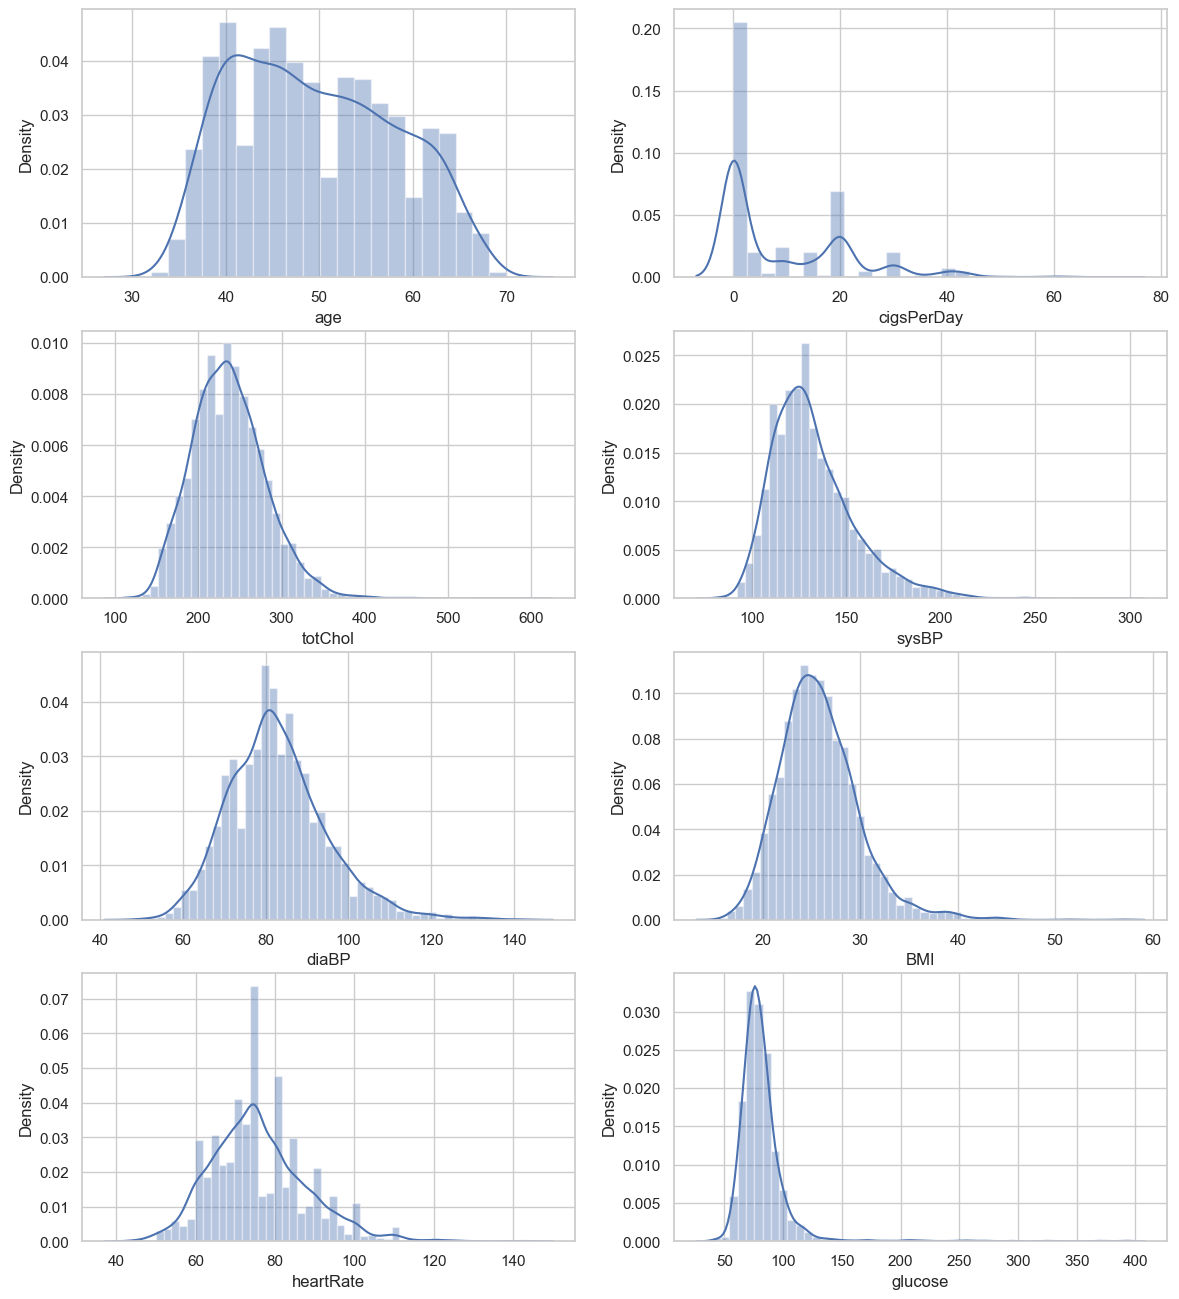

In [17]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in numeric_features:
    sns.distplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

The variable 'Cigarettes Per Day (CigsPerDay)' exhibits a highly uneven distribution.

Similarly, 'Heart Rate' (heartRate) also displays an uneven distribution.

In contrast, 'Glucose' (glucose), 'BMI' (Body Mass Index), 'Diastolic Blood Pressure (diaBP)', 'Systolic Blood Pressure (sysBP)', and 'Total Cholesterol (totChol)' demonstrate more even distributions.

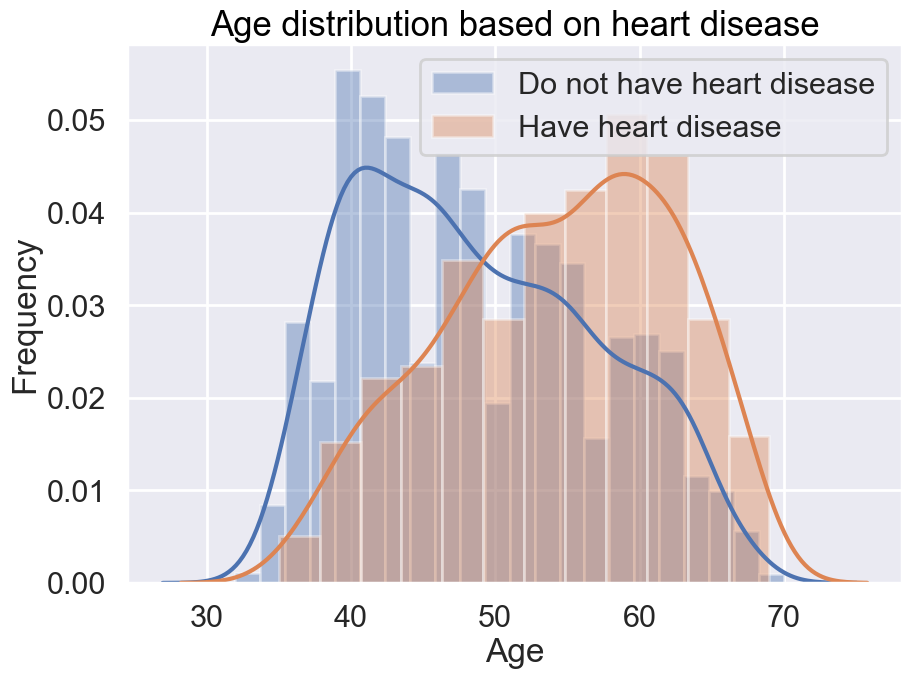

In [18]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(df[df['TenYearCHD'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['TenYearCHD'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## **Bivariant** **Analysis**

box and whisker Plot refrence: https://youtu.be/nV8jR8M8C74?si=tYPYDgI5NgHzP5dH

In [19]:
# # making boxplots to see the distribution
# plt.figure(figsize=(15,15))

# plt.subplot(3,2,1)
# sns.boxplot(x=df['TenYearCHD'],y=df['age'])
# plt.title('age')

# plt.subplot(3,2,2)
# sns.boxplot(x=df['TenYearCHD'],y=df['sysBP'])
# plt.title('sysBP')

# plt.subplot(3,2,3)
# sns.boxplot(x=df['TenYearCHD'],y=df['diaBP'])
# plt.title('diaBP')

# plt.subplot(3,2,4)
# sns.boxplot(x=df['TenYearCHD'],y=df['BMI'])
# plt.title('BMI')

# plt.subplot(3,2,5)
# sns.boxplot(x=df['TenYearCHD'],y=df['heartRate'])
# plt.title('heartRate')

# plt.tight_layout()

In [20]:
# # making boxplots to see the distribution
# plt.figure(figsize=(20,20))

# plt.subplot(3,2,1)
# sns.boxplot(x=df['TenYearCHD'],y=df['cigsPerDay'])
# plt.title('cigsPerDay')

# plt.subplot(3,2,2)
# sns.boxplot(x=df['TenYearCHD'],y=df['totChol'])
# plt.title('totChol')

# plt.subplot(3,2,3)
# sns.boxplot(x=df['TenYearCHD'],y=df['glucose'])
# plt.title('glucose')

# plt.tight_layout()

In [21]:
for i in df.columns:
    print(f"Skewness of '{i}': {df[i].skew()}")


Skewness of 'male': 0.22679521791763868
Skewness of 'age': 0.232005670746219
Skewness of 'education': 0.6886159285419894
Skewness of 'currentSmoker': 0.043768162046435834
Skewness of 'cigsPerDay': 1.2288662208765033
Skewness of 'BPMeds': 5.478216797215402
Skewness of 'prevalentStroke': 13.08956661312789
Skewness of 'prevalentHyp': 0.8136676933604815
Skewness of 'diabetes': 5.831397565099969
Skewness of 'totChol': 0.6643340667889772
Skewness of 'sysBP': 1.163611367302321
Skewness of 'diaBP': 0.7094069087330298
Skewness of 'BMI': 0.9996060883190834
Skewness of 'heartRate': 0.6708386116681982
Skewness of 'glucose': 6.2819106259853585
Skewness of 'TenYearCHD': 1.9364967388390146


In [22]:
# # Import necessary libraries
# import numpy as np
# # Define a function to remove outliers using capping
# def remove_outliers_capping(column, threshold=0.30):
#     # Calculate skewness
#     global outlier_count
#     skewness = column.skew()
    
#     # Check if skewness exceeds threshold
#     if abs(skewness) > threshold:
#         print("Column:", column.name)
#         # Calculate the capping values
#         Q1 = column.quantile(0.25)
#         Q3 = column.quantile(0.75)
#         IQR = Q3 - Q1
#         lower_cap = Q1 - 1.5 * IQR
#         upper_cap = Q3 + 1.5 * IQR
#         # Cap the outliers
#         column = column.clip(lower=lower_cap, upper=upper_cap)
    
#     return column

# # Iterate over each column in the DataFrame
# for column in numeric_features:
#     # Check skewness and remove outliers using capping if needed
#     df[column] = remove_outliers_capping(df[column])
# print(outlier_count)


In [23]:
# # Import necessary libraries
# import numpy as np

# # Define a function to count outliers
# def count_outliers(column, threshold=0.09):
#     # Calculate skewness
#     skewness = column.skew()
#     outlier_count = 0  # Initialize outlier_count for this column
    
#     # Check if skewness exceeds threshold
#     if abs(skewness) > threshold:
#         print("Column:", column.name)
#         # Calculate the capping values
#         Q1 = column.quantile(0.25)
#         Q3 = column.quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         # Count the outliers
#         outliers = column[(column < lower_bound) | (column > upper_bound)]
#         outlier_count += len(outliers)
    
#     return outlier_count

# # Iterate over each column in the DataFrame
# total_outlier_count = 0
# for column in numeric_features:
#     # Count outliers in each column
#     total_outlier_count += count_outliers(df[column])
#     print("Total outliers in ",column, ": is ", total_outlier_count)


In [126]:
# # making boxplots to see the distribution
# plt.figure(figsize=(15,15))

# plt.subplot(3,2,1)
# sns.boxplot(x=df['TenYearCHD'],y=df['age'])
# plt.title('age')

# plt.subplot(3,2,2)
# sns.boxplot(x=df['TenYearCHD'],y=df['sysBP'])
# plt.title('sysBP')

# plt.subplot(3,2,3)
# sns.boxplot(x=df['TenYearCHD'],y=df['diaBP'])
# plt.title('diaBP')

# plt.subplot(3,2,4)
# sns.boxplot(x=df['TenYearCHD'],y=df['BMI'])
# plt.title('BMI')

# plt.subplot(3,2,5)
# sns.boxplot(x=df['TenYearCHD'],y=df['heartRate'])
# plt.title('heartRate')

# plt.tight_layout()

In [25]:
# # making boxplots to see the distribution
# plt.figure(figsize=(20,20))

# plt.subplot(3,2,1)
# sns.boxplot(x=df['TenYearCHD'],y=df['cigsPerDay'])
# plt.title('cigsPerDay')

# plt.subplot(3,2,2)
# sns.boxplot(x=df['TenYearCHD'],y=df['totChol'])
# plt.title('totChol')

# plt.subplot(3,2,3)
# sns.boxplot(x=df['TenYearCHD'],y=df['glucose'])
# plt.title('glucose')

# plt.tight_layout()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [27]:
df.shape

(3658, 16)

# Statistics on the variables

In [28]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


--> The study's participants have an average age of 49 years, with the youngest participant being 32 years old and the oldest reaching 70 years.

--> Among the participants who smoke, the highest recorded number of cigarettes smoked is a remarkable 70.

--> The mean BMI (Body Mass Index) is 25. It's worth noting that BMI levels above 25 but below 30 are typically categorized as overweight, while individuals with BMI values exceeding 30 are considered obese.

--> The average glucose level is 81, which falls within the range of normal glucose levels, indicating a healthy distribution of glucose measurements among the study participants.

# Checking the target variable

In [29]:
df["TenYearCHD"].value_counts(normalize=True)

TenYearCHD
0    0.847731
1    0.152269
Name: proportion, dtype: float64

In [30]:
# 15% of the data indicative for positive disease in the near future

In [31]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Feature Selection using Chi Square (Category)

It's important to note that the chi-square test is suitable for nominal data, which consists of categories with no inherent order. However, if you are working with ordinal data, where categories have a meaningful order, it may be more appropriate to explore other statistical tests such as the Mann-Whitney U test or the Kruskal-Wallis test for our analysis.

In [33]:
categorical_features=df[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']]

In [34]:
categorical_features

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,1,0,0.0,0,0,0
1,0,0,0.0,0,0,0
2,1,1,0.0,0,0,0
3,0,1,0.0,0,1,0
4,0,1,0.0,0,0,0
...,...,...,...,...,...,...
4233,1,1,0.0,0,1,0
4234,1,1,0.0,0,0,0
4237,0,0,0.0,0,0,0
4238,1,0,0.0,0,1,0


In [35]:
from sklearn.feature_selection import chi2
X = categorical_features
y = df['TenYearCHD']

In [36]:
chi_scores = chi2(X, y)

In [37]:
chi_scores

(array([17.10775088,  0.68647384, 28.19156867,  8.5078328 , 82.84545536,
        31.06762071]),
 array([3.53178759e-05, 4.07366355e-01, 1.09882183e-07, 3.53620967e-03,
        8.87260079e-20, 2.49193807e-08]))

<Axes: >

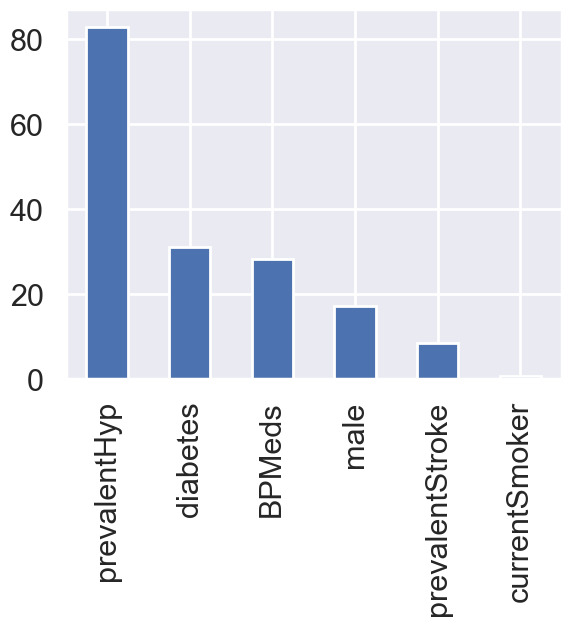

In [38]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

A high chi value means that there is a significant statistical relationship between the feature and the target variable.
Therefore we can include these features in out model.

<Axes: >

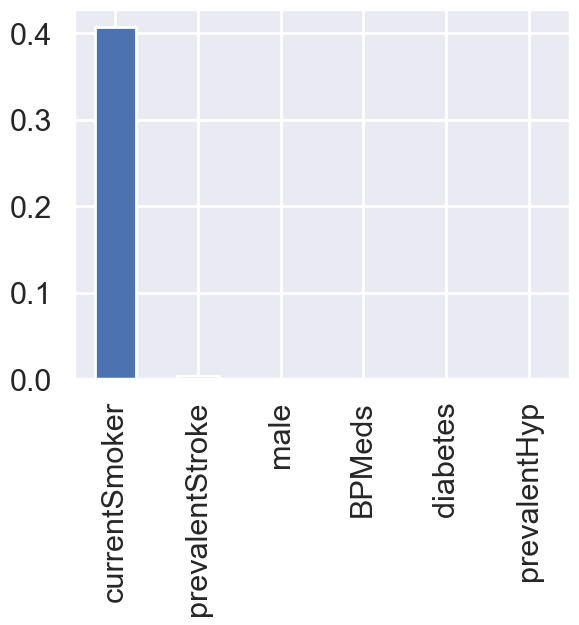

In [39]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()



In chi-squared feature selection, a lower p-value indicates that there is a significant statistical relationship between the feature and the target variable.
A low p-value suggests that the feature is not independent of the target variable and that there is strong evidence of association.


In this dataset, the p-value for the 'is_smoking' feature is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that this feature is not statistically significant for our analysis.

In [40]:
#Creating a dataset with only the features selected
data_features = df.drop(['currentSmoker', 'cigsPerDay','education','BPMeds','prevalentStroke','diabetes'], axis=1)
data_features.head()

,male,age,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## statistics on the top features

In [41]:
data_features.columns

Index(['male', 'age', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Models and Predictions

In [42]:
X = data_features.iloc[:, :-1]
y = data_features.iloc[:, -1]

In [43]:
X.head()

,male,age,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,0,285.0,130.0,84.0,23.10,85.0,85.0


In [44]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

# Splitting data to Training and Testing set

In [45]:
data_features.columns

Index(['male', 'age', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [46]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Feature Scaling

Feature scaling is a technique employed to standardize the range of independent variables or features within a dataset. The primary goal is to bring all features to a common scale or range. This process often results in faster execution times for various algorithms and enhances the performance of machine learning models.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

In [49]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (2926, 9)
y_train shape: (2926,)


# Models

The five algorithms that will be used are:
1. Logistic Regression
2. k-Nearest Neighbours
3. Decision Trees
4. Support Vector Machine
5.Random Forest Classifier

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# Logistic regression

The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a logit transformation of the probability of presence of the characteristic of interest: logit function

Rather than choosing parameters that minimize the sum of squared errors (like in ordinary regression), estimation in logistic regression chooses parameters that maximize the likelihood of observing the sample values.

In [51]:
from sklearn.linear_model import LogisticRegression

In [127]:
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [129]:
# make predictions
logistic_predict = logistic_clf.predict(X_test)

In [130]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 84.02%


<Axes: >

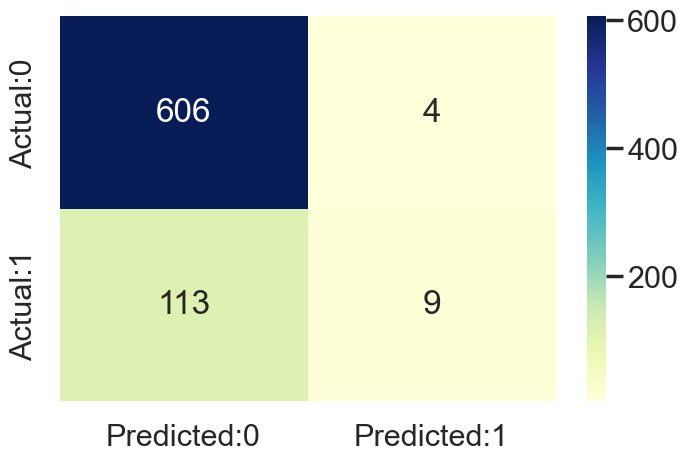

In [131]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [58]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.69      0.07      0.13       122

    accuracy                           0.84       732
   macro avg       0.77      0.53      0.52       732
weighted avg       0.82      0.84      0.78       732



In [59]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 13.33%


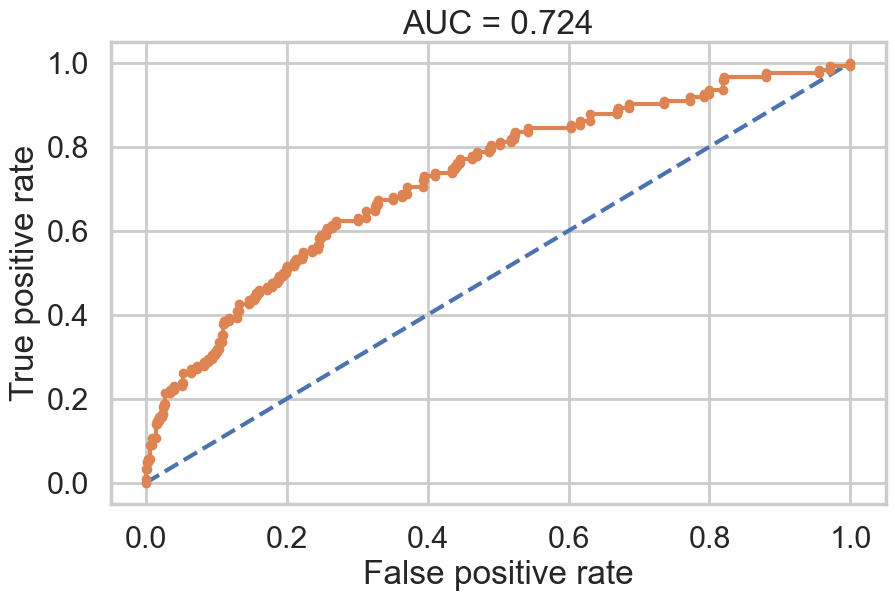

In [120]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

# K-Nearest Neighbours

The k-nearest-neighbors is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [63]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 4}

In [64]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [65]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 83.47%


<Axes: >

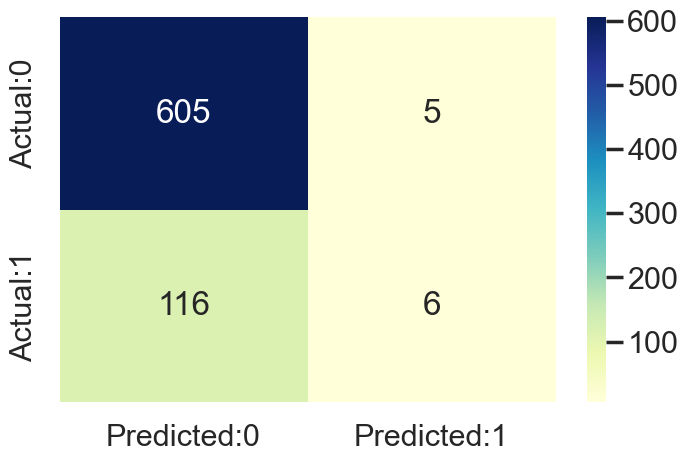

In [66]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [67]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.55      0.05      0.09       122

    accuracy                           0.83       732
   macro avg       0.69      0.52      0.50       732
weighted avg       0.79      0.83      0.77       732



In [68]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 9.02%


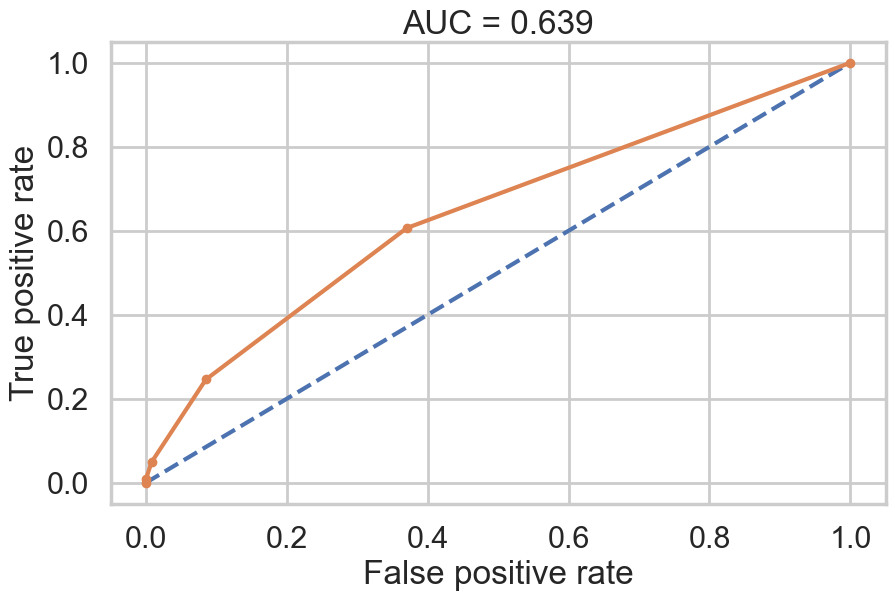

In [69]:
# ROC curve and AUC
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

# Decision Trees

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [71]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [72]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 2}

In [73]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [74]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 80.6%


<Axes: >

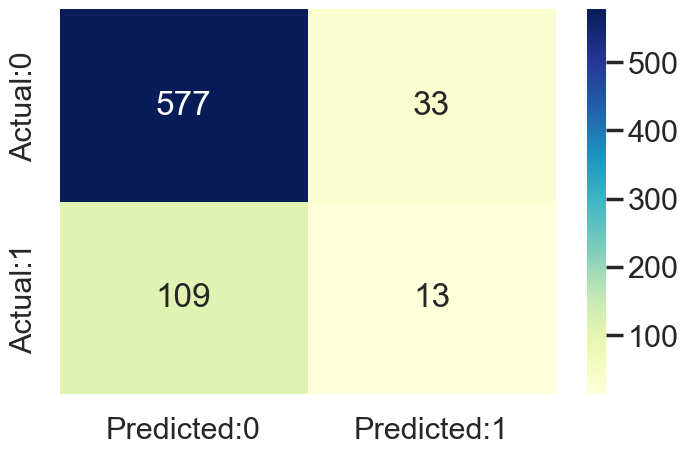

In [75]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [76]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       610
           1       0.28      0.11      0.15       122

    accuracy                           0.81       732
   macro avg       0.56      0.53      0.52       732
weighted avg       0.75      0.81      0.77       732



In [77]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 15.48%


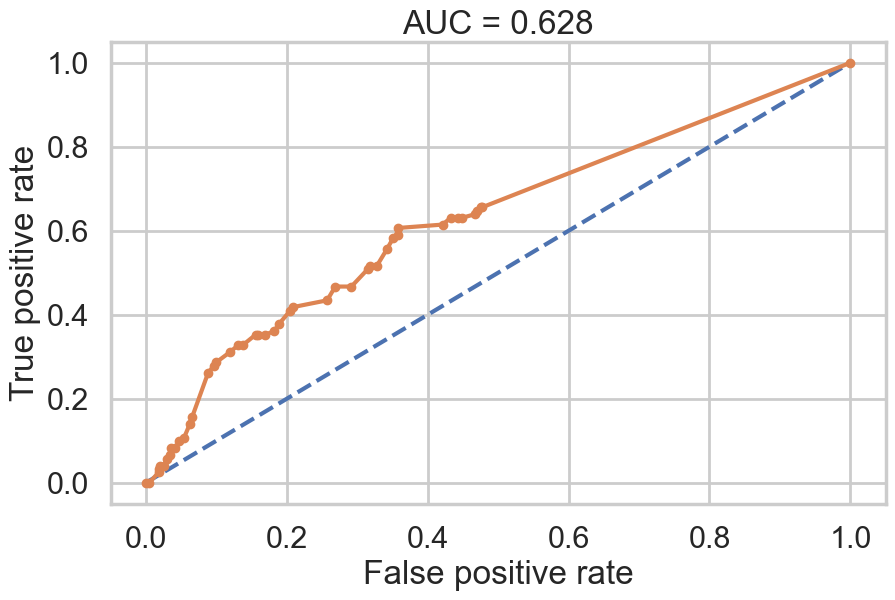

In [78]:
# ROC curve and AUC
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

# Model Comparison

In [99]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
}).T
comparison['Sum'] = comparison['Accuracy'] + comparison['AUC'] + comparison['F1 score']

# Find the model with the highest sum
best_model = comparison['Sum'].idxmax()

print("The model that collectively performed the best is:", best_model)

The model that collectively performed the best is: Logistic regression


In [100]:
comparison

,Accuracy,AUC,F1 score,Sum
Logistic regression,0.840164,0.723636,0.133333,1.697133
K-nearest neighbours,0.834699,0.638854,0.090226,1.563779
Decision trees,0.806011,0.628097,0.154762,1.588870


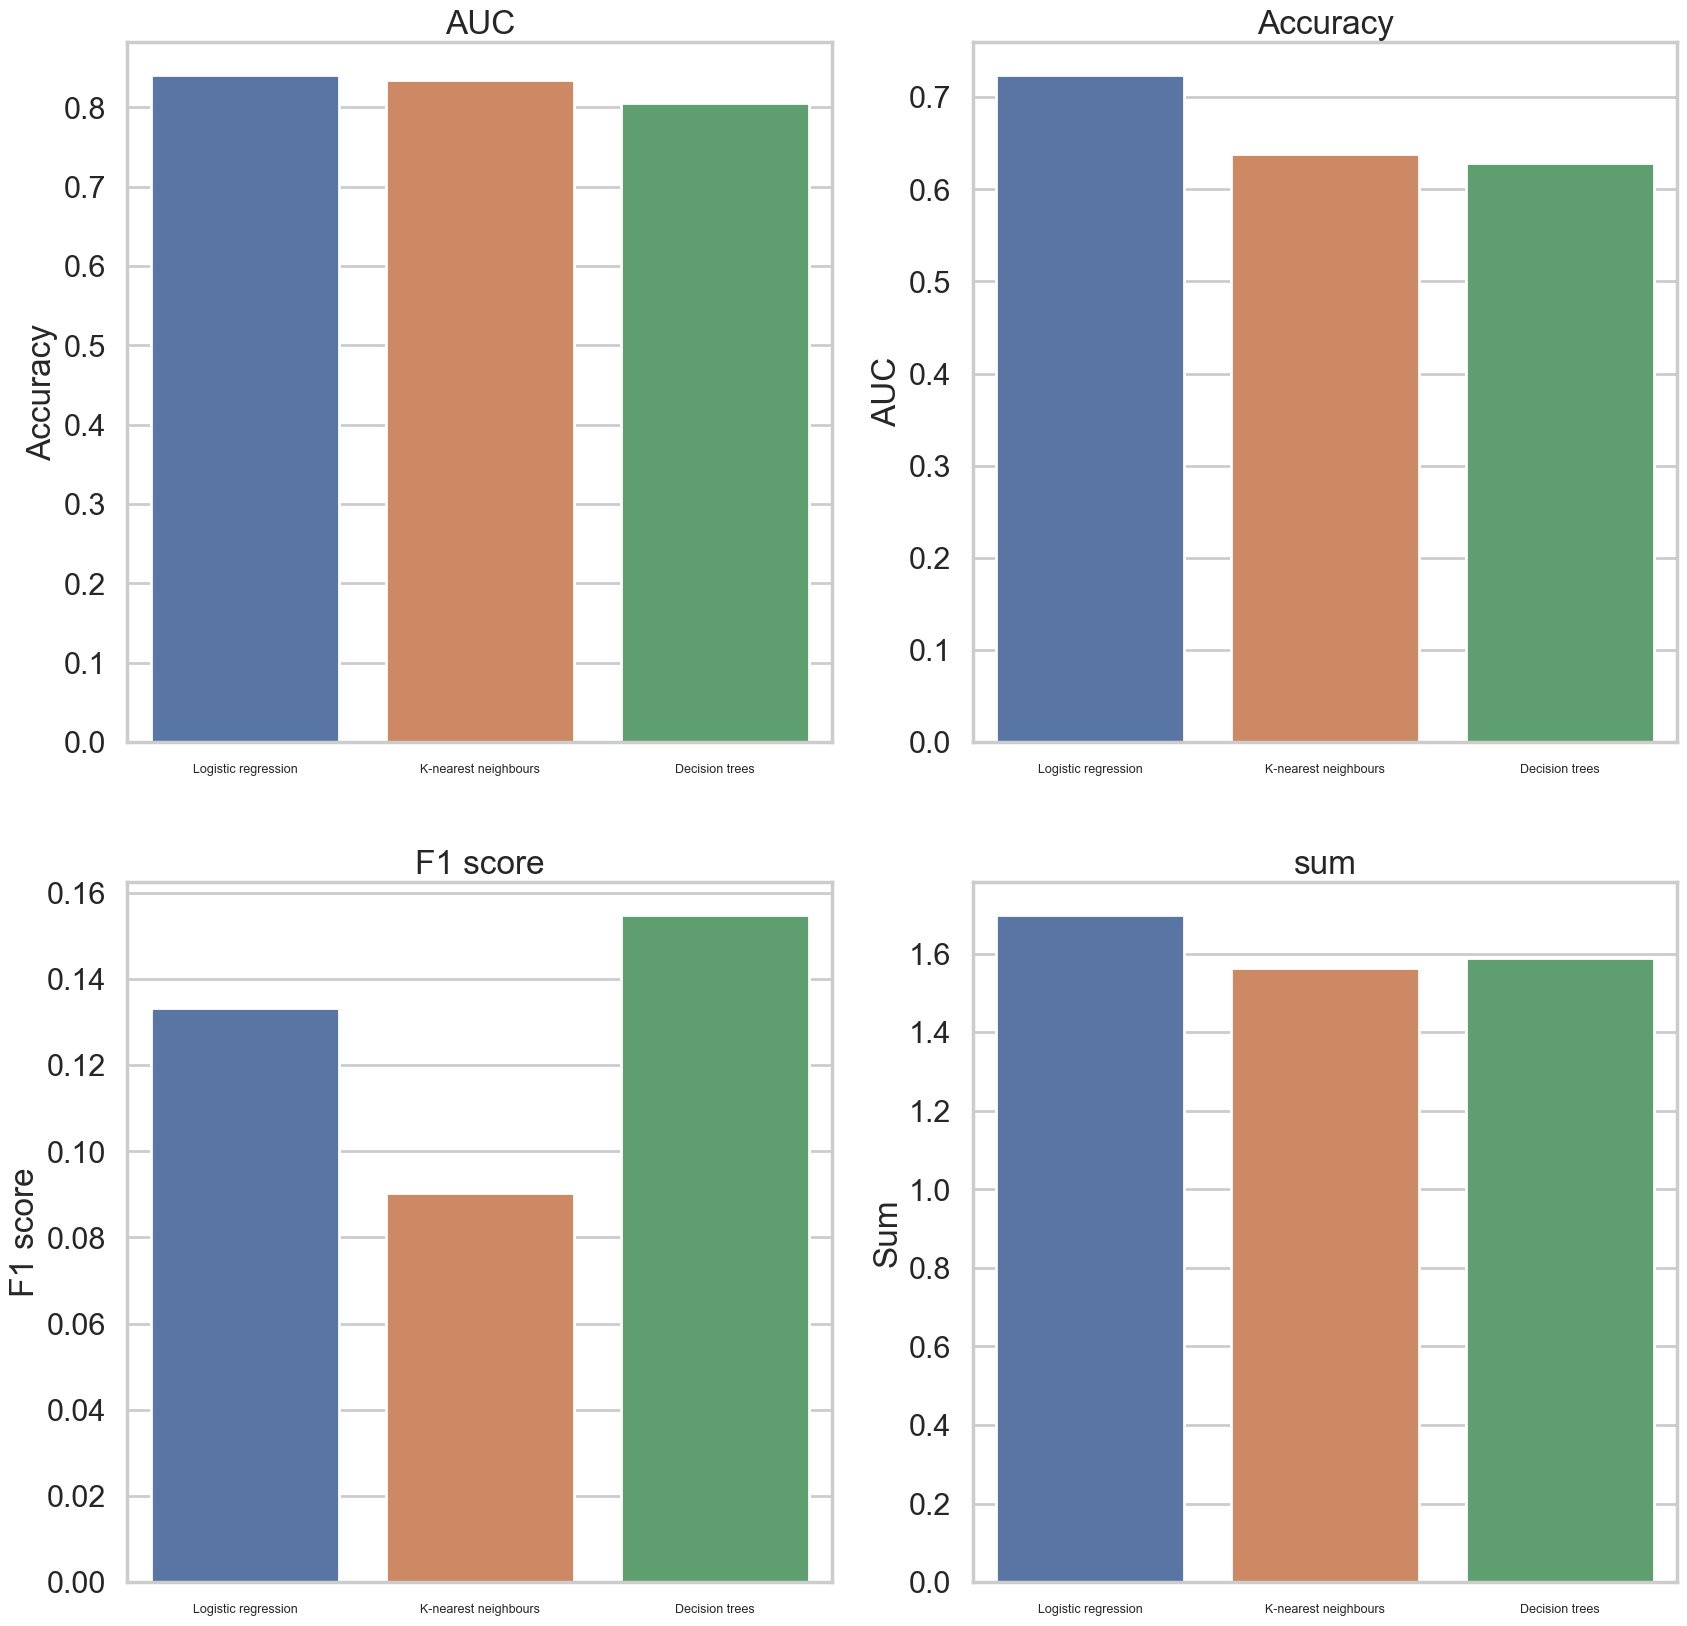

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'comparison'

# Ensure titles list matches the number of columns in comparison DataFrame
titles = ['AUC','Accuracy','F1 score','sum']

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(20, 20)

# Iterate over columns and titles simultaneously
for title, label in enumerate(comparison.columns):
    # Check if the index is within the bounds of the titles list
    if title < len(titles):
        plt.subplot(2, 2, title + 1)
        sns.barplot(x=comparison.index, y=comparison[label], data=comparison)
        plt.xticks(fontsize=9)
        plt.title(titles[title])
    else:
        print(f"Not enough titles provided for all columns. Skipping column {label}.")

plt.show()


# Conclusion:

In this healthcare-focused project, we harnessed the power of machine learning to extract meaningful insights from medical data. Our primary objective was to develop a predictive model that could assist in health-related decision-making.

After rigorous experimentation with multiple machine learning algorithms, the Logistic regression (LR) emerged as the standout performer. It achieved an accuracy rate of 84.01%. This signifies that LR excels in accurately identifying health outcomes, which is crucial for medical professionals and patients alike.

These findings hold immense promise for the healthcare domain. The ability to predict health outcomes with such precision can revolutionize patient care, leading to earlier disease detection, tailored treatment plans, and optimized healthcare resource allocation. It empowers medical practitioners with data-driven insights to make informed decisions, ultimately improving patient well-being.

Beyond healthcare, this project underscores the transformative potential of machine learning across various sectors. By harnessing data, we can drive innovation, enhance decision-making, and contribute to a brighter, healthier future for all.
